<h1 align="center">Data Modelling</h1>

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('data_eda.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Company Name,Rating,Location,Size,Founded,Type of ownership,Industry,...,avg_salary,age,power_bi_yn,tableau_yn,python_yn,sql_yn,excel_yn,machine_learning_yn,job_simp,desc_len
0,Data Analyst,MYR 25K - MYR 91K (Employer est.),Your work makes the difference between a user ...,Citymapper,-1.0,Kuala Lumpur,-1,-1,-1,-1,...,58.0,-1,0,0,0,0,0,0,data analyst,783
1,DATA ANALYST,MYR 42K - MYR 60K (Employer est.),Basic Background & Requirement:\nBachelor in A...,MyFundAction,-1.0,Shah Alam,-1,-1,-1,-1,...,51.0,-1,0,0,0,0,0,0,data analyst,470
2,Industry Analyst,MYR 48K - MYR 65K (Employer est.),This is a permanent work-from-home position.\n...,ENF Solar Ltd.,-1.0,Kuala Lumpur,-1,-1,-1,-1,...,56.5,-1,0,0,0,0,0,0,industry analyst,704
3,Data Migration Analyst,MYR 96K (Employer est.),Requirements\n· Must be Malaysian\nJob Descrip...,AMK Technology Sdn Bhd,4.2,Kuala Lumpur,201 to 500 Employees,2002,Company - Private,IT Services,...,96.0,18,0,0,0,0,0,0,data migration analyst,306
4,Junior Data Analyst (Recent Graduate May be Co...,MYR 25K - MYR 38K (Employer est.),Junior Data Scientist\nPM101 Consulting Kuala ...,PM101 Consulting,-1.0,Kuala Lumpur,-1,-1,-1,-1,...,31.5,-1,0,0,0,0,0,0,junior data analyst,537


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Rating', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'salary_estimate_split',
       'salary_estimate_hourly', 'min_salary', 'max_salary', 'avg_salary',
       'age', 'power_bi_yn', 'tableau_yn', 'python_yn', 'sql_yn', 'excel_yn',
       'machine_learning_yn', 'job_simp', 'desc_len'],
      dtype='object')

In [6]:
# Choose relevent columns
df_model = df[['avg_salary','Rating','Location','Size','Type of ownership','Industry','Sector','Revenue','age','salary_estimate_hourly','power_bi_yn', 'tableau_yn', 'python_yn', 'sql_yn', 'excel_yn',
       'machine_learning_yn', 'job_simp', 'desc_len']]


In [7]:
# Get dummy data 
df_dum = pd.get_dummies(df_model)

In [8]:
from sklearn.model_selection import train_test_split
# Train test split
X = df_dum.drop(columns='avg_salary')
y = df['avg_salary'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
# Check the coef between the variables
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     55.05
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           4.72e-87
Time:                        09:57:18   Log-Likelihood:                -788.63
No. Observations:                 241   AIC:                             1655.
Df Residuals:                     202   BIC:                             1791.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           21.6522      1.206     17.956      0.000      19.275      24.030
Rating                                          -0.7248      0.736     -0.985      0.326      -2.175       0.726
age                                              0.3613      0.040      9.009      0.000       0.282       0.440
salary_estimate_hourly                         -65.6346      7.261     -9.040      0.000     -79.951     -51.318
power_bi_yn                                     41.5731      2.349     17.701      0.000      36.942      46.204
tableau_yn                                       1.4099      3.039      0.464      0.643      -4.581       7.401
python_yn                                      -41.1734      5.633     -7.309      0.000     -52.281     -30.065
sql_yn                                          -4.7970      1.940     -2.473      0.014      -8.621      -0.972
excel_yn                                        22.4606      3.786      5.933      0.000      14.996      29.925
machine_learning_yn                             15.2844      1.583      9.654      0.000      12.163      18.406
desc_len                                        -0.0171      0.002     -8.889      0.000      -0.021      -0.013
Location_Cheras                                  3.7262      3.386      1.101      0.272      -2.949      10.402
Location_Kampong Puchong                         5.8967      3.090      1.908      0.058      -0.197      11.990
Location_Kuala Lumpur                           15.3614      1.450     10.592      0.000      12.502      18.221
Location_Kuala Terengganu                       -7.8271      3.281     -2.386      0.018     -14.296      -1.358
Location_Malaysia                                6.7754      2.361      2.870      0.005       2.121      11.430
Location_Pantai Valley                          -4.7744      1.860     -2.567      0.011      -8.442      -1.107
Location_Petaling Jaya                          24.6450      3.332      7.396      0.000      18.075      31.215
Location_Seri Kembangan                         -7.3878      3.283     -2.251      0.025     -13.860      -0.915
Location_Shah Alam                               0.6585      2.212      0.298      0.766      -3.703       5.020
Location_Subang Jaya                           -15.4216      3.774     -4.087      0.000     -22.863      -7.981
Size_-1                                          4.6958      0.725      6.481      0.000       3.267       6.124
Size_1 to 50 Employees                         -12.2873      2.635     -4.663      0.000     -17.483      -7.092
Size_10000+ Employees                          -11.2444      1.961     -5.734      0.000     -15.111      -7.378
Size_1001 to 5000 Employees     

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
cv = 3
# Using multiple linear regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
# Use cross validation to segregate data and calculate negative mean absolute error
np.mean(cross_val_score(lr_model,X_train,y_train, scoring='neg_mean_absolute_error', cv=cv))

-5.152439781714782

In [11]:
# Using lasso regreassion because alot sparse matrix
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
np.mean(cross_val_score(lasso_model,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= cv))

-12.689299141518148

C:\Users\Darknman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.33533673954662, tolerance: 6.0164375
  model = cd_fast.enet_coordinate_descent(
C:\Users\Darknman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1600.5930323603325, tolerance: 5.925613867187501
  model = cd_fast.enet_coordinate_descent(


,alpha,error
1,0.02,-4.887804


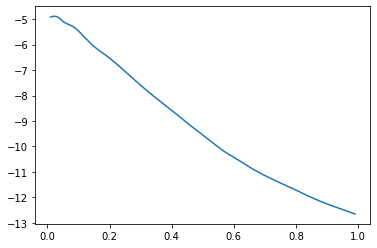

In [12]:
# Finding best alpha for lasso model
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lasso_model = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lasso_model,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [13]:
# Update lasso parameter
lasso_model = Lasso(alpha=0.02)
lasso_model.fit(X_train,y_train)
np.mean(cross_val_score(lasso_model,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= cv))

C:\Users\Darknman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4706.880942707792, tolerance: 8.6111203125
  model = cd_fast.enet_coordinate_descent(


-4.887803602750557

In [14]:
# Using random forest  because alot sparse matrix(tree base model to compare linear model)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
np.mean(cross_val_score(rf_model,X_train,y_train, scoring='neg_mean_absolute_error', cv=cv))


-2.5209635416666667

**We can see that in 3 iterations we get lowest negative MAE for RandomForestRegressor. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

In [15]:
# Random forest had lowest negative MAE
# Tune Random forest with multiple parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gsv = GridSearchCV(rf_model,parameters,scoring='neg_mean_absolute_error',cv=cv)
gsv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [16]:
gsv.best_score_ , gsv.best_estimator_

(-2.120052083333333, RandomForestRegressor(n_estimators=30))

In [17]:
# Test models
pred_lr = lr_model.predict(X_test)
pred_lasso = lasso_model.predict(X_test)
pred_rf = gsv.best_estimator_.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pred_lr), mean_absolute_error(y_test,pred_lasso), mean_absolute_error(y_test,pred_rf)

(5.318979296899906, 5.2584658530879524, 3.376870748299319)

In [19]:
mean_absolute_error(y_test,(pred_lr+pred_rf)/2)

4.215271961374819

## Based on the modelling, RandomForestRegressor will be the best model. Hence we will use that for prediction.

## Export model in pickle format

In [20]:
# Export
import pickle
pickl = {'model': gsv.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

## Load the model again for testing

In [21]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [23]:
# Predict first row of data using the trained model
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

92.0

In [24]:
# This X input will be used for flask data input
list(X_test.iloc[1,:])

[3.6,
 13.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 511.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]